<a href="https://colab.research.google.com/github/venom1204/QMLHEP/blob/main/task1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq
import cirq
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
# A) Define 5 qubits
qubits = [cirq.LineQubit(i) for i in range(5)]

# Create a quantum circuit
circuit = cirq.Circuit()

In [3]:
# B) Applied Hadamard operation to every qubit
circuit.append(cirq.H(q) for q in qubits)

In [4]:
# C) Apply CNOT gates
circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]) for i in range(4))

In [5]:
# D) Applied SWAP between qubits 0 and 4
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

In [6]:
# E) Apply X rotation by pi/2 on qubit 2
circuit.append(cirq.rx(np.pi / 2)(qubits[2]))

In [7]:
# Print and plot the circuit
print("Quantum Circuit 1:")
print(circuit)

Quantum Circuit 1:
0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───


In [11]:
# Simulate the circuit
simulator = cirq.Simulator()  # Use Cirq's simulator
# Add a measurement to all qubits
circuit.append(cirq.measure(*qubits, key='result')) # measure all qubits and store the results under the key 'result'
result = simulator.run(circuit, repetitions=1024)
counts = result.histogram(key='result')
print("Measurement Outcomes:", counts)

Measurement Outcomes: Counter({13: 44, 10: 41, 24: 39, 21: 39, 19: 38, 11: 38, 18: 37, 17: 36, 2: 35, 6: 34, 14: 34, 23: 34, 25: 33, 0: 33, 15: 33, 30: 33, 26: 32, 28: 31, 31: 30, 7: 30, 4: 30, 9: 30, 16: 29, 20: 29, 1: 28, 12: 28, 29: 26, 3: 25, 8: 24, 27: 24, 22: 24, 5: 23})


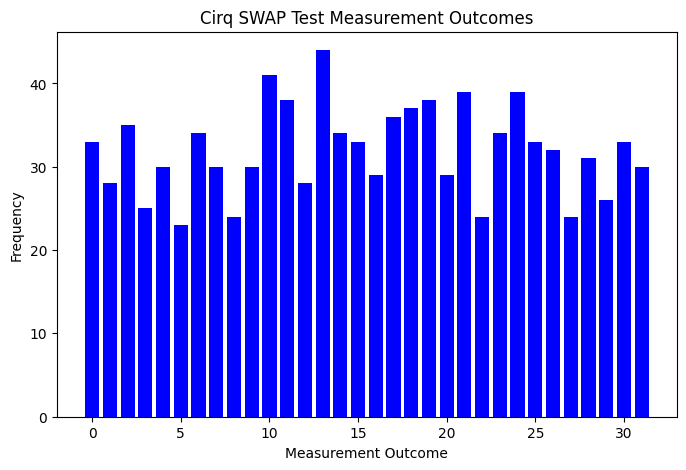

In [12]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel("Measurement Outcome")
plt.ylabel("Frequency")
plt.title("Cirq SWAP Test Measurement Outcomes") # Changed title to Cirq
plt.show()